# Sentiment Analisis
Start date: 9th May 2019

The goal of this exercise is to determine the opinion about each political party based on the news

We will base our study in the four parties that obtained most votes in the spanish national elections last 28th of April. These are: PSOE, PP, C's and Podemos


In [0]:
Global = {"PSOE" : [], "PP":[], "Cs":[], "Pdms":[]} # Dictionary that has the articles for each party.

# Data cleaning

Prepare the data for analysis

##Corpus

The first step is to load the dataframe, which was obtained using web scraping. Our dataset is in the .json  format.

When working with colab, we must use files.upload to upload our dataframe



In [4]:
import os
import json

from google.colab import files
uploaded = files.upload()


Saving articulos-vanguardia.txt to articulos-vanguardia.txt


In [0]:
with open(r'articulos-vanguardia.txt') as json_file:  
    data = json.load(json_file)
    
import pandas as pd
data_table = pd.DataFrame(columns=['title', 'body'])
for i in range(len(data['articles'])):
    if "La Vanguardia Ediciones Todos los derechos reservados" in data['articles'][i]['body']: # Clean
        data['articles'][i]['body'] = data['articles'][i]['body'].rstrip("La Vanguardia Ediciones Todos los derechos reservados")
    
    data_table.loc[i] = [data['articles'][i]['title'], data['articles'][i]['body']]
    

## Cleaning

Before classifyng the articles acording to the party, we are going to performe a initial cleaning of the data to simplify the problem in general and the task of classifying in particular

The function clean_text_round1 make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers

The function clean_text_round2 remove those words which appear frequently and do not give much information

clean_text_round3 remove the words that have meaning but are very frequently used for all parties

Here we should include the lematization between rounds 1 and 2

In [26]:
import re
import string

def clean_text_round1(text):
    text = text.lower() #this makes text lowecase
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #remove words that contain numbers
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\r', '', text)
    text = re.sub("[¡!@#$+%*:()'-]", ' ', text)
    text = re.sub('¿', '', text)
    return text
  
def clean_text_round2(text):
    text = re.sub(' a ', ' ', text)
    text = re.sub(' an ', ' ', text)
    text = re.sub(' ante ', ' ', text)
    text = re.sub(' con ', ' ', text)
    text = re.sub(' de ', ' ', text)
    text = re.sub(' en ', ' ', text)
    text = re.sub(' por ', ' ', text)
    text = re.sub(' el ', ' ', text)
    text = re.sub(' la ', ' ', text)
    text = re.sub(' los ', ' ', text)
    text = re.sub(' las ', ' ', text)
    text = re.sub(' es ', ' ', text)
    text = re.sub(' son ', ' ', text)
    text = re.sub(' que ', ' ', text)
    text = re.sub(' y ', ' ', text)
    text = re.sub(' del ', ' ', text)
    text = re.sub(' al ', ' ', text)
    text = re.sub(' un ', ' ', text)
    text = re.sub(' una ', ' ', text)
    text = re.sub(' se ', ' ', text)
    text = re.sub(' para ', ' ', text)
    text = re.sub(' le ', ' ', text)
    text = re.sub(' lo ', ' ', text)
    text = re.sub(' ha ', ' ', text)
    text = re.sub(' su ', ' ', text)
    text = re.sub(' sus ', ' ', text)
    text = re.sub(' no ', ' ', text) # We may want to keep the "no" for the 
    text = re.sub(' más ', ' ', text)
    text = re.sub(' han ', ' ', text)
    text = re.sub(' este ', ' ', text)
    text = re.sub(' pero ', ' ', text)
    text = re.sub(' también ', ' ', text)
    text = re.sub(' uno ', ' ', text)
    text = re.sub(' como ', ' ', text)
    text = re.sub(' esta ', ' ', text)
    text = re.sub(' ya ', ' ', text)
    text = re.sub(' sí ', ' ', text)
    text = re.sub(' partido ', ' ', text)
    text = re.sub(' sobre ', ' ', text)
    text = re.sub(' desde ', ' ', text)
    text = re.sub(' entre ', ' ', text)
    text = re.sub('  ', ' ', text)
    return text
  
def clean_text_round3(text):
    text = re.sub(' elecciones ', ' ', text)
    #text = re.sub(' pp ', ' ', text)
    #text = re.sub(' sánchez ', ' ', text)
    text = re.sub(' gobierno ', ' ', text)
    #text = re.sub(' psoe ', ' ', text)
    #text = re.sub(' ciudadanos ', ' ', text)
    text = re.sub(' presidente ', ' ', text)
    text = re.sub(' escaño ', ' ', text)
    text = re.sub(' generales ', ' ', text)
    text = re.sub(' electoral ', ' ', text)
    text = re.sub(' resultado ', ' ', text)
    text = re.sub(' españa ', ' ', text)
    text = re.sub(' espanya ', ' ', text)
    text = re.sub(' voto ', ' ', text)
    text = re.sub('  ', ' ', text)
    return text
  

for index, row in data_table.iterrows():
  row['title'] = clean_text_round1(row['title'])
  row['body'] = clean_text_round1(row['body'])

for index, row in data_table.iterrows():
  row['title'] = clean_text_round2(row['title'])
  row['body'] = clean_text_round2(row['body'])
  row['body'] = clean_text_round3(row['body'])

SyntaxError: ignored

Now we classify the articles of our *data_table* in the dictionary named *Global* attending to the party they are talking about. Bear in mind that an article may be in several party categories

In [12]:
data_table.head()


,title,body
0,españa sorprende europa,la socialdemocracia resiste península ibérica ...
1,sánchez intentará gobernar solitario pese nece...,vicepresidenta funciones socialista carmen ca...
2,crece descontento casado descalabro electoral pp,pablo casado compareció ayer medios comunicaci...
3,así producido sangría escaños pp españa vaciada,más mitad escaños ganado ciudadanos ayer graci...
4,rivera cierra puerta nuevo pacto abrazo sánchez,la pregunta repetida dirigentes ciudadanos aye...


In [14]:
def clasifier(data_table):
  Global = {"PSOE" : [], "PP":[], "Cs":[], "Pdms":[]} # Reset dictionary
  lista_match_psoe = ['psoe','sánchez', 'socialistas', 'socialista', 'susana', 'puig', 'psc']
  lista_match_pp = ['pp', 'casado', 'populares', 'popular', 'rajoy', 'aznar', 'pedro'] #quita españa de aqui
  lista_match_cs = ['ciudadanos', 'rivera', 'arrimadas', 'naranja', 'albert']
  lista_match_pdms = ['podemos', 'unidas', 'iglesias', 'montero', 'carmena', 'morada']
  lista_match_general = lista_match_psoe + lista_match_pp + lista_match_cs + lista_match_pdms

#any recibe un iteriable y si cualquiera de los elementos es True te devuelve un true
  for index, row in data_table.iterrows():
    #print(index, row)
    if any([match for match in lista_match_psoe if match in row['title']]):
      Global["PSOE"].append({"title": row['title'], "body": row['body']})
    if any([match for match in lista_match_pp if match in row['title']]):
      Global["PP"].append({"title": row['title'], "body": row['body']})
    if any([match for match in lista_match_cs if match in row['title']]):
      Global["Cs"].append({"title": row['title'], "body": row['body']})
    if any([match for match in lista_match_pdms if match in row['title']]):
      Global["Pdms"].append({"title": row['title'], "body": row['body']})
    if not any([match for match in lista_match_general if match in row['title']]): #if not in title, we look in the body
      if any([match for match in lista_match_psoe if match in row['body']]):
        Global["PSOE"].append({"title": row['title'], "body": row['body']})
      if any([match for match in lista_match_pp if match in row['body']]):
        Global["PP"].append({"title": row['title'], "body": row['body']})
      if any([match for match in lista_match_cs if match in row['body']]):
        Global["Cs"].append({"title": row['title'], "body": row['body']})
      if any([match for match in lista_match_pdms if match in row['body']]):
        Global["Pdms"].append({"title": row['title'], "body": row['body']})
  print("Classified")
  return Global
  
Global = clasifier(data_table)


Classified


In [15]:
print(Global["PSOE"])




[{'title': 'españa sorprende europa', 'body': 'la socialdemocracia resiste península ibérica mientras partidos nacionalpopulistas capturan muchos antiguos electores izquierda diversos países europeos europa mira estos días cierta sorpresa psoe convierte referente cuando apenas faltan cuatro semanas eurocámara pocas palabras pedro sánchez acaba adquirir montón acciones mercado futuros europeo dato indudable interés centros decisión económica dato debería pasar desapercibido waterloo horas después debacle pp aznar lanza consigna reunificación qué tienen común portugal además compartir balsa piedra imaginada escritor josé saramago ambos países sufrieron dictaduras longevas sur europa restos dictador civil portugués antónio oliveira salazar personaje hermético nunca fue muy amigo obispos reposan discreta tumba parroquia vimeiro muy lejos coimbra restos general francisco franco hallan depositados gigantesco mausoleo provincia madrid cuyo mantenimiento corre cargo estado español recuerdo lar

## Document Term-Matrix

* Convert this *Global* dictionary in a pandas dataframe
* Use countvectorizer to tokenize the text. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.
* Idea for improvment: Take "no blabla" as one term instead of ""no" + "blabla"






In [16]:
data_clean = pd.DataFrame({"party":[], "text":[]}) 
#Pandas table with cleaned data

for key in Global.keys():
  totaltext = str(key)
  for element in Global[key]: totaltext = totaltext + " " + element["title"] + " " + element["body"]
  df_aux = pd.DataFrame({"party":[key],"text":[totaltext]})  
  data_clean = pd.concat([data_clean, df_aux], ignore_index=True) 
data_clean    




,party,text
0,PSOE,PSOE españa sorprende europa la socialdemocrac...
1,PP,PP españa sorprende europa la socialdemocracia...
2,Cs,Cs españa sorprende europa la socialdemocracia...
3,Pdms,Pdms españa sorprende europa la socialdemocrac...


The pandas dataframe *data_clean* is going to be converted in *data_dtm
*, the document term-matrix.
The first thing we do when using CountVectorizer is to define a CountVectorizer object, cv.


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer(stop_words='spanish') # This stop_words could be used as an alternative to clean_text_round2
cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abajo,abanderada,abandonado,abandonar,abascal,abascalse,abc,abierta,abiertas,abierto,abiertos,abismo,aboca,abocados,aboga,abogacía,abogada,abogado,abogados,abogando,abonado,abordar,aborde,abra,abran,abrazarse,abrazo,abre,abren,abrieron,abril,abrir,abrirlas,abrirse,abriría,abrupta,abrupto,abría,abrían,absoluta,...,álavateodoro,álvarez,álvaro,ámbito,ámbitos,ángel,ángela,ángeles,árbitro,área,áreas,áspera,él,época,éramos,ésta,éste,ética,éxito,éxitopara,íbamos,índice,índole,ínfimo,íñigo,òminum,óptima,órdenes,órgano,óscarurralburu,última,últimas,último,últimos,única,únicamente,único,únicos,útil,útiles
0,2,1,3,1,6,1,1,2,2,3,2,3,1,1,1,3,1,14,2,1,1,3,1,1,1,1,2,11,1,1,24,4,0,1,1,1,1,0,3,21,...,1,1,0,2,0,3,1,1,1,1,0,1,10,1,2,1,3,1,6,1,1,1,1,0,3,0,0,3,1,1,5,3,8,5,3,0,5,1,4,3
1,2,0,3,1,27,1,1,1,0,1,1,3,0,1,1,0,0,4,2,0,1,3,0,1,1,1,0,7,1,1,24,2,1,1,1,2,1,1,0,23,...,1,9,1,3,1,4,0,1,0,0,1,1,10,1,1,0,5,0,7,1,0,0,1,1,4,1,1,0,0,1,7,7,9,9,7,1,5,0,1,1
2,2,0,3,1,17,1,0,2,2,2,2,2,0,1,1,3,1,4,1,1,1,3,1,1,1,1,2,5,0,1,21,3,0,1,1,1,1,0,3,22,...,1,1,0,1,0,3,0,1,0,0,0,1,8,0,2,1,1,0,6,1,0,1,1,0,3,0,0,2,0,1,5,5,7,6,1,0,4,1,2,1
3,2,0,3,1,5,1,0,2,2,2,2,2,0,1,1,3,1,2,0,0,1,2,0,1,1,1,0,3,0,0,21,3,0,0,1,0,1,0,3,19,...,1,1,0,0,0,2,0,1,0,0,1,1,9,0,2,1,3,0,4,1,0,1,1,1,3,0,0,2,0,1,5,3,7,6,1,0,5,1,1,1


In [0]:
# Let's pickle (save as a file) it for later use
#data_dtm.to_pickle("dtm.pkl")
#data_clean.to_pickle('data_clean.pkl')
#pickle.dump(cv, open("cv.pkl", "wb"))

# Exploratory Data Analysis

This step uses the *corpus* and *document term matrix* as imputs. Here we are going summarize the main characteristics of the dataset in order to figure out the main trends and if they make sense


We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques

In [0]:
# Find the top 30 words said by each party
top_dict = {}
#for c in data_dtm.columns: # c runs over the words
#  top = data_dtm[c].sort_values(ascending=False).head()
#  top_dict[c]= list(zip(top.index, top.values))

for index, row in data_dtm.iterrows():
    #print("El partido " + str(row[index]))
    data_dtm = data_dtm.sort_values(by = index, axis=1, ascending=False) #If axis is 0 is columns and if 1 rows
    top = data_dtm.iloc[index][0:30]
    top_dict[index] = top
    
top_dict["PSOE"]=top_dict.pop(0)
top_dict["PP"]=top_dict.pop(1)
top_dict["Cs"]=top_dict.pop(2)
top_dict["Pdms"]=top_dict.pop(3)

In [19]:
print("-----------------")
print("Most used words")
print("-----------------")
print(" - PSOE - ")
print(top_dict["PSOE"])
print("_______")
print(" - PP - ")
print(top_dict["PP"])
print("_______")
print(" - Ciudadanos - ")
print(top_dict["Cs"])
print("_______")
print(" - Unidas Podemos - ")
print(top_dict["Pdms"])
print("_______")


-----------------
Most used words
-----------------
 - PSOE - 
pp            131
sánchez       121
psoe          121
ciudadanos     91
catalunya      65
vox            65
puigdemont     64
resultados     61
gente          60
si             60
ser            57
derecha        57
erc            56
tras           56
escaños        55
pedro          53
porque         53
dos            53
votos          52
el             52
podemos        51
diputados      49
sido           48
centro         47
sin            47
muy            46
después        45
cuando         45
ahora          44
rivera         44
Name: 0, dtype: int64
_______
 - PP - 
pp            226
psoe          116
vox           108
sánchez        96
ciudadanos     94
casado         76
catalunya      74
escaños        73
derecha        69
dos            68
diputados      67
resultados     64
sido           61
si             57
centro         51
ser            51
podemos        51
votos          51
primera        49
congreso       4

Now we are gonna have a look the top words that are common for all parties. We can follow two strategies with them:

*   Identify those that are meaningless and remove them from the *top_dict*
*   Remove them all 




In [20]:
common_words = []

for key, val in top_dict.items():
  for word, rep in top_dict[key].items():
    if word not in common_words:
      common_words.append(word)

print("List of common words among most used words for each party")
print(common_words)

List of common words among most used words for each party
['pp', 'sánchez', 'psoe', 'ciudadanos', 'catalunya', 'vox', 'puigdemont', 'resultados', 'gente', 'si', 'ser', 'derecha', 'erc', 'tras', 'escaños', 'pedro', 'porque', 'dos', 'votos', 'el', 'podemos', 'diputados', 'sido', 'centro', 'sin', 'muy', 'después', 'cuando', 'ahora', 'rivera', 'casado', 'primera', 'congreso', 'pablo', 'campaña', 'mayoría', 'líder', 'hecho', 'madrid', 'dice', 'formación', 'mayo', 'todo']


Let's do the word cloud

In [0]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [0]:
data_clean.iloc[0]['text']

'PSOE sánchez intentará gobernar solitario pese necesitar apoyos ser investido  vicepresidenta funciones socialista carmen calvo aclarado intención pedro tratar gobernar solitario próxima legislatura pese necesitar apoyos menos ser investido pretensión sido defendida candidatura socialista durante todo periodo preelectoral eso llevarla cabo demandó victoria amplia urnas tras conocer resultados estos comicios desde dirección ven victoria sido suficientemente amplia intentar gobernar sin grandes ataduras habida cuenta apresurado dar portazo prestarse si quiera permitir investidura funciones socialistas quieren buscar apoyo erc palabras calvo cadena ser dejan estacada idea unidas podemos apoyar través coalición quiere ejecutivo monocolor exclusiva así expresado vicepresidenta pensamos tenemos respaldo suficiente ser timón barco aunque saben perfectamente colaboración confluencias lideradas pablo iglesias ayudado mucho nos refuerza sentido progresista intención seguir línea solitario frent

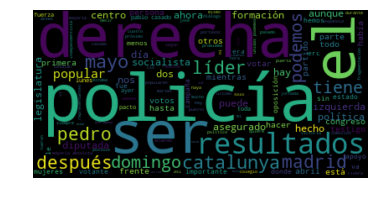

In [51]:
#To clean the Word Clouds
def clean_text_round4(text):
    text = re.sub(' pp ', ' ', text)
    text = re.sub(' sánchez ', ' ', text)
    text = re.sub(' psoe ', ' ', text)
    text = re.sub(' ciudadanos ', ' ', text)
    text = re.sub(' escaños ', ' ', text)
    text = re.sub(' todo ', ' ', text)
    text = re.sub(' socialista ', ' ', text)
    text = re.sub(' tras ', ' ', text)
    text = re.sub(' otro ', ' ', text)
    text = re.sub(' porque ', ' ', text)
    text = re.sub(' dice ', ' ', text)
    text = re.sub(' vox ', ' ', text)
    text = re.sub(' muy ', ' ', text)
    text = re.sub(' si ', ' ', text)
    text = re.sub(' diputado ', ' ', text)
    text = re.sub(' diputados ', ' ', text)
    text = re.sub(' cuando ', ' ', text)
    text = re.sub(' sido ', ' ', text)
    text = re.sub(' gente ', ' ', text)
    return text


# Generate Word Clouds
partyindex = 3 # partyindex = 0, 1, 2 or 3 depending on which cloud do you want to plot
wordcloud = WordCloud().generate(clean_text_round4(data_clean.iloc[partyindex]['text'])) 

import matplotlib.pyplot as plt
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Techniques

Here we apply the NLP advanced techniques
The input for this is the cleaned data and the certaninty that the data makes sense,

The main library for NLP is *nltk* and we are going to use *TextBlob* which is build on the top of *nltk*

## Translation

For using *TextBlob* we need the text in english. So we use the googletrans

In [0]:
 #!pip install -q google_api_translate
!pip install -q googletrans


In [0]:
from googletrans import Translator, LANGCODES
translator = Translator()


In [0]:
from googletrans import Translator
translator = Translator()
translator.translate('안녕하세요.')


JSONDecodeError: ignored

In [0]:
# To check the code of each languaje
LANGCODES

I consiedered that it is better to translate each article as a whole because the googletrans group the words in a way that, for isntance, "not very beautiful" is understood as single unit.

In [0]:
Gobal_translated = clasifier(data_table)
#Gobal_translated['Pdms']


totales = 0
fracasos = 0
for party, lista in Gobal_translated.items():
  print("====")
  print(party)
  for articulo in lista:
    totales = totales + 1
    #print("----")
    #print(articulo['title'])
    a = str(articulo['title'])
    b = str(articulo['body'])
    try:
      print("1")
      translation_title = translator.translate('a', dest = 'en', src = 'es')
      print("2")
      #translation_body = translator.translate(b, dest = 'en', src = 'es')
      articulo['title'] = translation_title.text
      #articulo['body'] = translation_body.text
      print(articulo['title'])
    except:
      fracasos = fracasos + 1
      lista.remove(articulo)
      
print("====")      
print(str(fracasos) + " out of "+ str(totales) + " articles could not be translated")
      
    

Classified
====
PSOE
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
====
PP
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
====
Cs
1
1
1
1
1
1
1
1
1
1
1
1
====
Pdms
1
1
1
1
1
1
1
====
57 out of 57 articles could not be translated


In [0]:
data_trans = pd.DataFrame({"party":[], "text":[]}) 

for key in Gobal_translated.keys():
  totaltext = str(key)
  for element in Gobal_translated[key]: totaltext = totaltext + " " + element["title"] + " " + element["body"]
  df_aux = pd.DataFrame({"party":[key],"text":[totaltext]})  
  data_trans = pd.concat([data_trans, df_aux], ignore_index=True) 
data_trans 

,party,text
0,PSOE,PSOE rivera cierra puerta nuevo pacto abrazo s...
1,PP,PP crece descontento casado descalabro elector...
2,Cs,Cs la faes lamenta canibalización suicida inst...
3,Pdms,Pdms el cis tezanos acertó el cis tezanos inic...


## TextBlob

In [0]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_trans['polarity'] = data_trans['text'].apply(pol)
data_trans['subjectivity'] = data_trans['text'].apply(sub)
data_trans

,party,text,polarity,subjectivity
0,PSOE,PSOE vice president functions socialist govern...,0.066758,0.404868
1,PP,PP the social democracy resists Iberian penins...,0.082358,0.414527
2,Cs,Cs the question repeated citizen leaders since...,0.086154,0.420359
3,Pdms,Pdms at this point the Spanish right should kn...,0.089888,0.430905


The avarage polarity for every party is very similar so we are going to study the papers separately

In [0]:
#study of each article
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_trans['polarity'] = data_trans['text'].apply(pol)
data_trans['subjectivity'] = data_trans['text'].apply(sub)
data_trans

for key in Gobal_translated.keys():
  print("----------------------------")
  print("  Articles of "  +str(key))
  print("  Feel title   |   Sub title")
  print("---------------------------")
  totaltext = str(key)
  for articulo in Global[key]:
    print(".  "+str(articulo['title'].pol)+"  |  " + str(articulo['title'].sub))
    

----------------------------
  Articles of PSOE
  Feel title   |   Sub title
---------------------------


AttributeError: ignored

In [0]:

Gobal_translated

{'Cs': [{'body': 'no será advirtió pablo casado hacía cada mitin cada entrevista cada intervención campaña avisaba inconveniencia votar otro centro derecha si quería era desalojar pedro sánchez moncloa porque además perjudicar intereses pp hasta descalabro cosechado lograría objetivo pretendido así sido fundación faes dirige ex presidente gobierno josé maría aznar sale defensa casado advertencias lamentar canibalización suicida instalado centro derecha español análisis postelectoral organización publicado lunes justifican fragmentación centro derecha haya allanado fatalmente camino pedro sánchez continúe moncloa porque si pretendía era echar sánchez basta expresar deseos ayer hizo justamente contrario necesitaba conseguir ese objetivo fragmentación suma sumará contrario receta fracaso otras ocasiones lamentado propio aznar faes muestra rotunda expresar ni opciones intercambiables ni da igual votar u otro puesto demostrado fragmentación suma sumará contrario receta fracaso hecho fundaci

 <- This has to be finished

##Sentiment Analysis

We may download a labeled dataset, clean and classify it, and use it to train a NN that understands the feel of our texts